In [26]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
from plot_data import plot_sensor_measurement, plot_sensor_calibration, plot_wind_rose


start_date = datetime(2023, 10, 14, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 14, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20]
quickflow_directory = "/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/"


In [27]:
do_pivot = True

if do_pivot:
    local_path = "../data/"
    df_parq = pl.scan_parquet(os.path.join(quickflow_directory, "measurements.parquet")).collect().pivot(
                    values="value",
                    index=[
                        "system_name",
                        "revision",
                        "creation_timestamp",
                        "receipt_timestamp",
                    ],
                    columns="attribute",
                    aggregate_function="first",
                )

    df_parq.write_parquet(
                os.path.join(local_path, "pivot_measurements.parquet"),
                statistics=True,
            )

In [28]:
df = pl.scan_parquet(os.path.join(quickflow_directory, "pivot_measurements.parquet"))

df = df.sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df.tail(5).collect()

shape: (5, 37)
┌───────────┬──────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ system_na ┆ revision ┆ creation_t ┆ receipt_ti ┆ … ┆ cal_sht45_ ┆ cal_gmp343 ┆ cal_bme280 ┆ cal_bottle │
│ me        ┆ ---      ┆ imestamp   ┆ mestamp    ┆   ┆ humidity   ┆ _temperatu ┆ _humidity  ┆ _id        │
│ ---       ┆ i32      ┆ ---        ┆ ---        ┆   ┆ ---        ┆ re         ┆ ---        ┆ ---        │
│ str       ┆          ┆ datetime[n ┆ datetime[n ┆   ┆ f64        ┆ ---        ┆ f64        ┆ f64        │
│           ┆          ┆ s, UTC]    ┆ s, UTC]    ┆   ┆            ┆ f64        ┆            ┆            │
╞═══════════╪══════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ tum-esm-m ┆ 26       ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 09:17:04.8 ┆ 09:17:05.6 ┆   ┆            ┆            ┆            ┆            │
│ spi-4     ┆          ┆ 90 UTC     ┆ 66363 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 14       ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 09:17:05.2 ┆ 09:17:05.4 ┆   ┆            ┆            ┆            ┆            │
│ spi-6     ┆          ┆ 60 UTC     ┆ 32458 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 8        ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 09:17:05.3 ┆ 09:17:07.7 ┆   ┆            ┆            ┆            ┆            │
│ spi-20    ┆          ┆ 50 UTC     ┆ 32883 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 13       ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 09:17:06.0 ┆ 09:17:08.4 ┆   ┆            ┆            ┆            ┆            │
│ spi-8     ┆          ┆ 40 UTC     ┆ 47196 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 9        ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 09:17:07.7 ┆ 09:17:10.0 ┆   ┆            ┆            ┆            ┆            │
│ spi-14    ┆          ┆ 60 UTC     ┆ 19516 UTC  ┆   ┆            ┆            ┆            ┆            │
└───────────┴──────────┴────────────┴────────────┴───┴────────────┴────────────┴────────────┴────────────┘

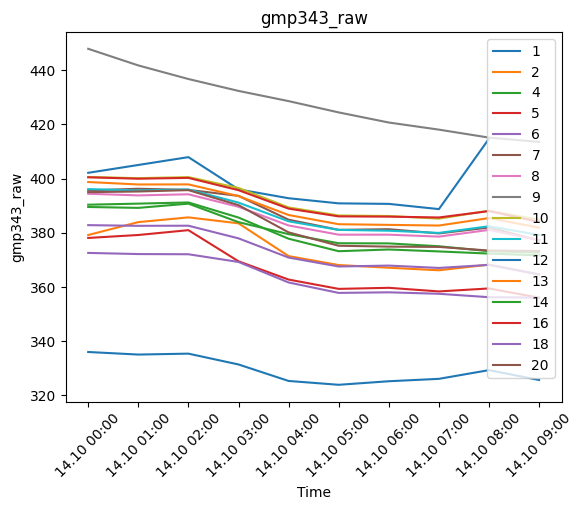

In [29]:
plot_sensor_measurement(df,col_name="gmp343_raw",sensor_id=sensor_id,filter='1h')

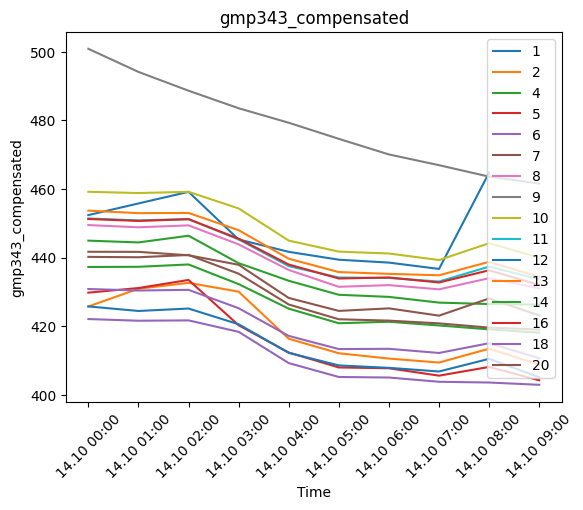

In [30]:
plot_sensor_measurement(df,col_name="gmp343_compensated",sensor_id=sensor_id,filter='1h')

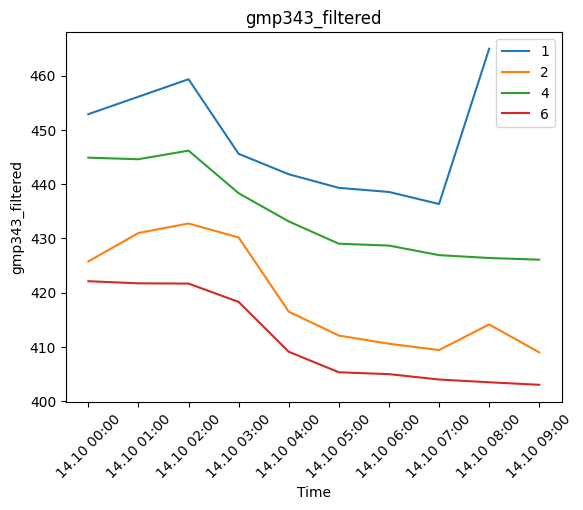

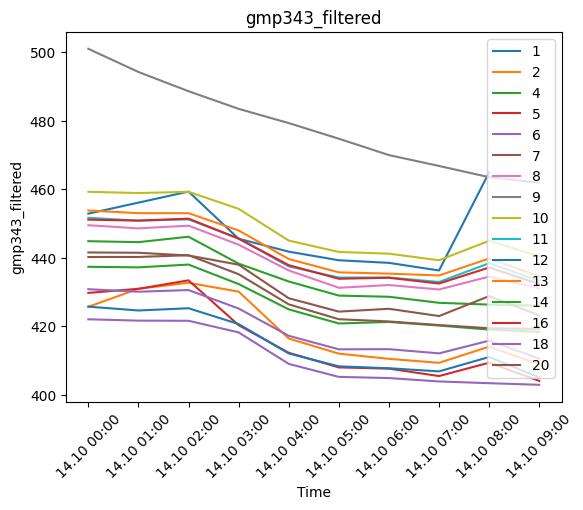

In [31]:
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=[1,2,3,4,6],filter='1h')
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=sensor_id,filter='1h')

In [32]:
# Maisach
plot_wind_rose(df,1, 'Maisach')
# Rechts-der-Isar
plot_wind_rose(df,2, 'Rechts-der-Isar')
# Finsing
plot_wind_rose(df,3, 'Finsing')
# Großhadern
plot_wind_rose(df,4, 'Großhadern')
# Großhadern
plot_wind_rose(df,5, 'Pasing')
# plot wind at 3m pole inlet
plot_wind_rose(df,7, 'TUM')

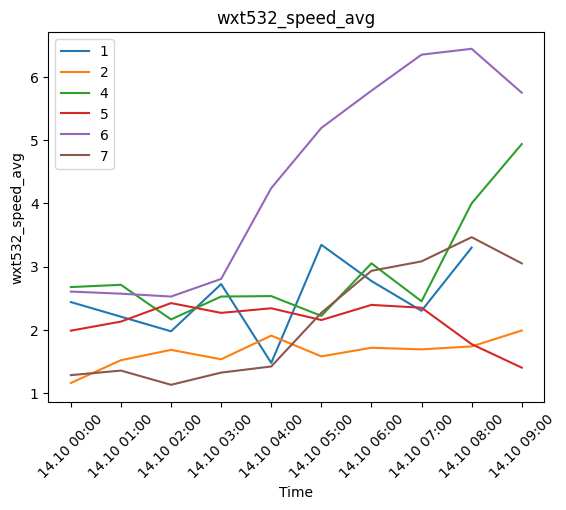

In [33]:
plot_sensor_measurement(df,col_name="wxt532_speed_avg",sensor_id=sensor_id,filter='1h')

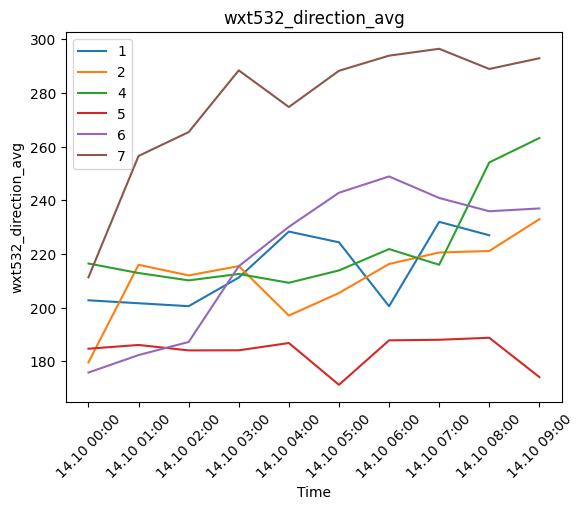

In [34]:
plot_sensor_measurement(df,col_name="wxt532_direction_avg",sensor_id=sensor_id,filter='1h')

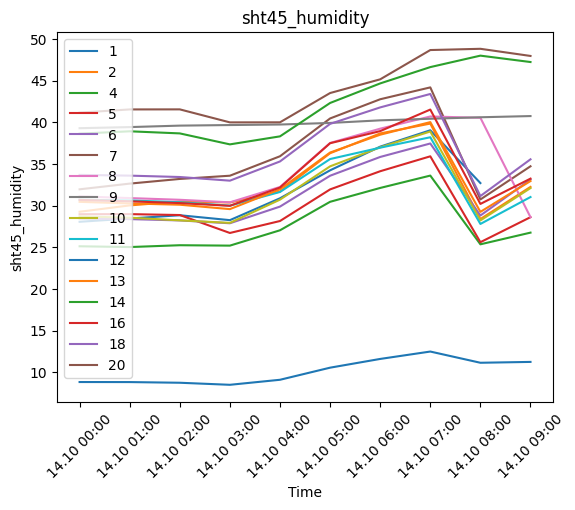

In [35]:
# Plot auxilliary data
plot_sensor_measurement(df,col_name="sht45_humidity",sensor_id=sensor_id,filter='1h')

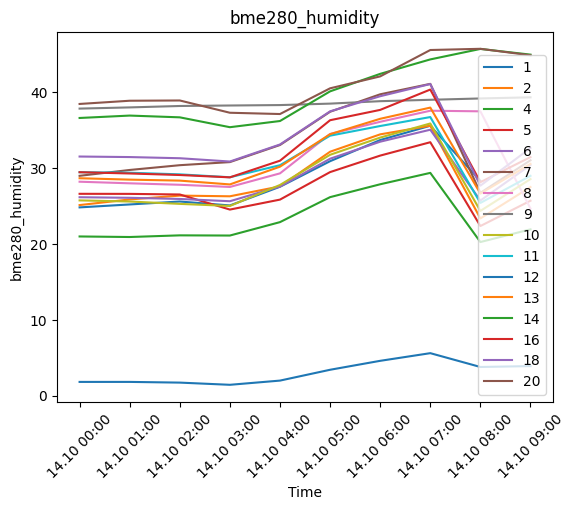

In [36]:
plot_sensor_measurement(df,col_name="bme280_humidity",sensor_id=sensor_id,filter='1h')

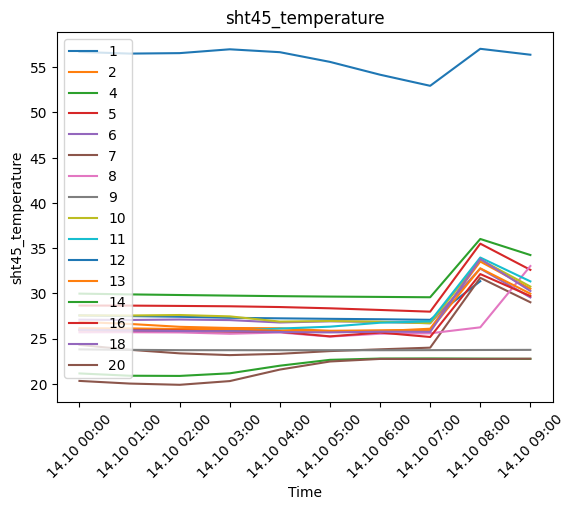

In [37]:
plot_sensor_measurement(df,col_name="sht45_temperature",sensor_id=sensor_id,filter='1h')

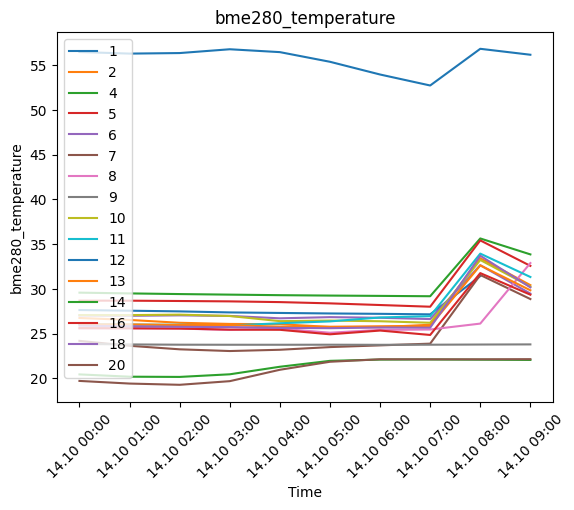

In [38]:
plot_sensor_measurement(df,col_name="bme280_temperature",sensor_id=sensor_id,filter='1h')

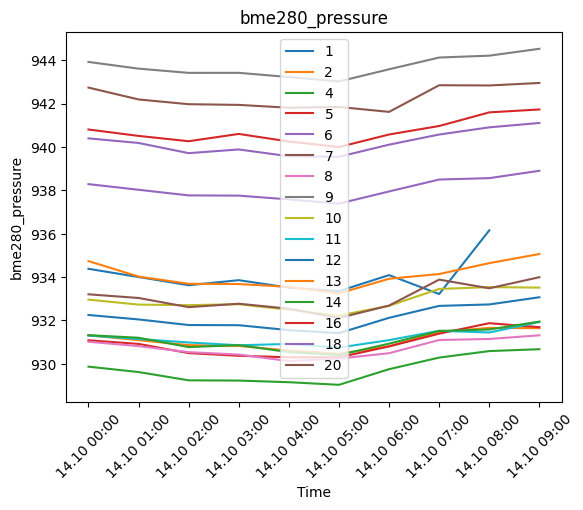

In [39]:
plot_sensor_measurement(df,col_name="bme280_pressure",sensor_id=sensor_id,filter='1h')

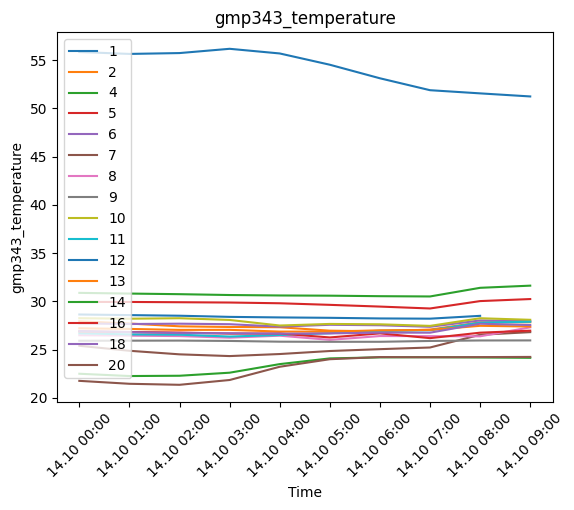

In [40]:
plot_sensor_measurement(df,col_name="gmp343_temperature",sensor_id=sensor_id,filter='1h')

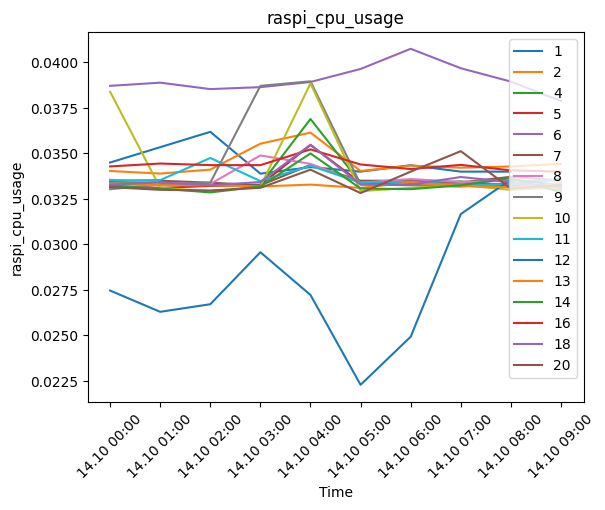

In [41]:
plot_sensor_measurement(df,col_name="raspi_cpu_usage",sensor_id=sensor_id,filter='1h')

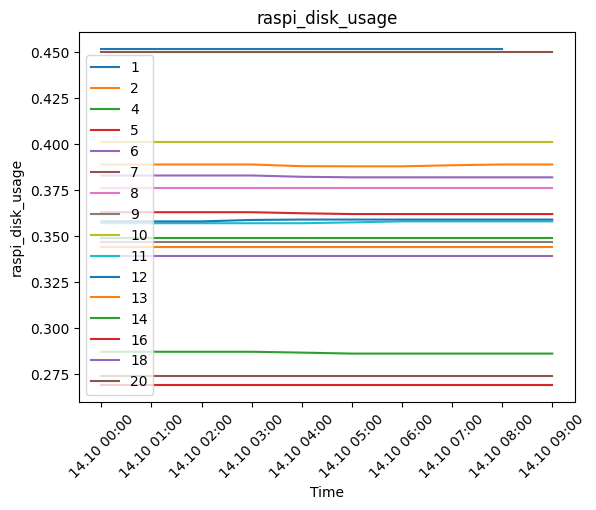

In [42]:
plot_sensor_measurement(df,col_name="raspi_disk_usage",sensor_id=sensor_id,filter='1h')

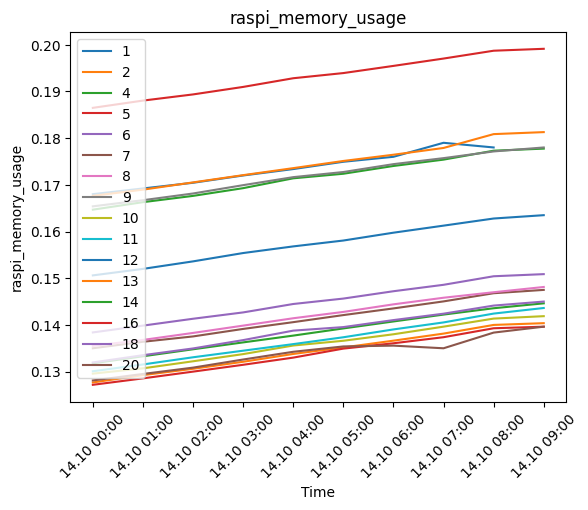

In [43]:
plot_sensor_measurement(df,col_name="raspi_memory_usage",sensor_id=sensor_id,filter='1h')

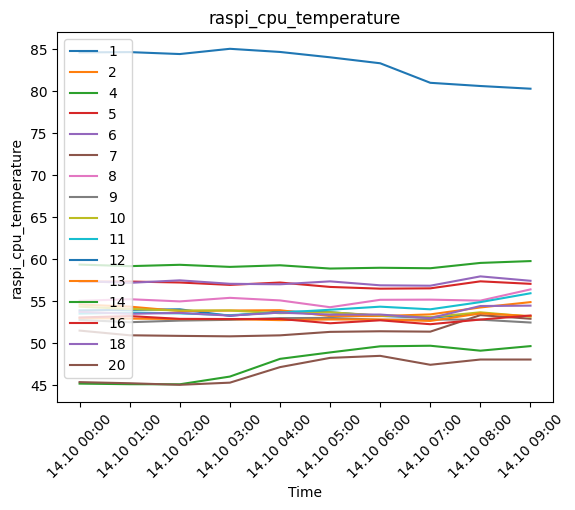

In [44]:
plot_sensor_measurement(df,col_name="raspi_cpu_temperature",sensor_id=sensor_id,filter='1h')

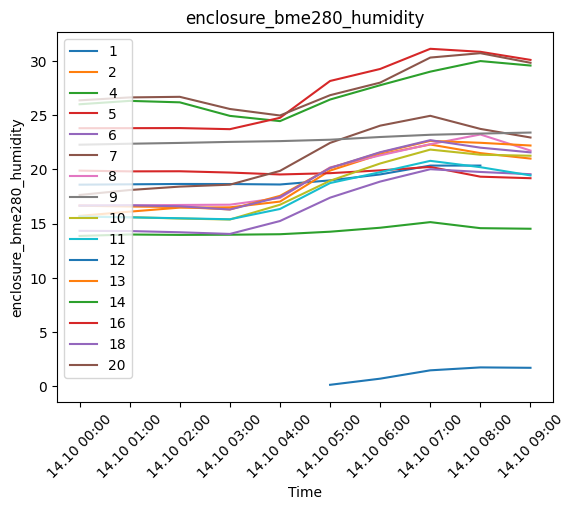

In [45]:
plot_sensor_measurement(df,col_name="enclosure_bme280_humidity",sensor_id=sensor_id,filter='1h')

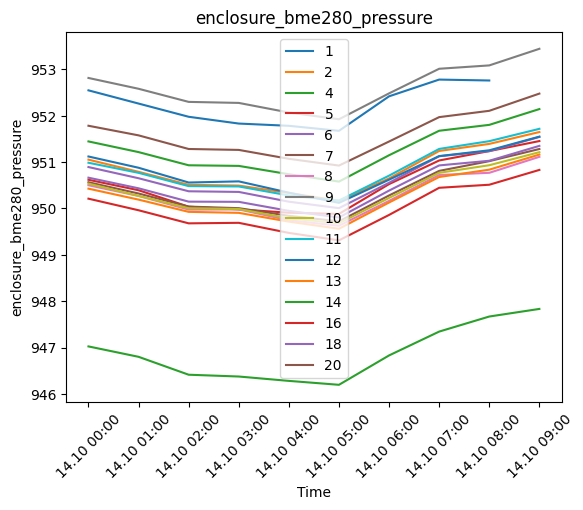

In [46]:
plot_sensor_measurement(df,col_name="enclosure_bme280_pressure",sensor_id=sensor_id,filter='1h')

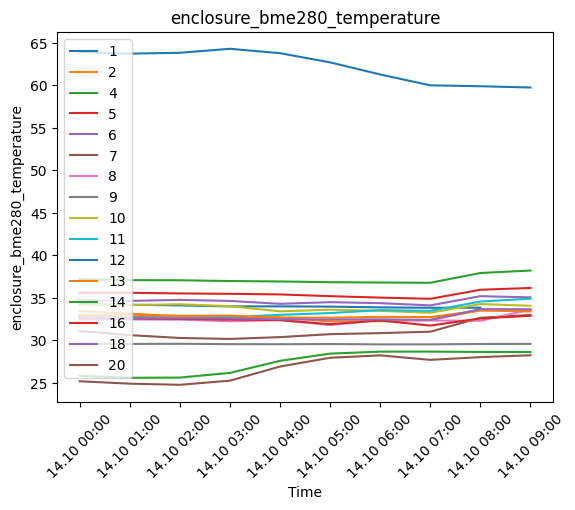

In [47]:
plot_sensor_measurement(df,col_name="enclosure_bme280_temperature",sensor_id=sensor_id,filter='1h')

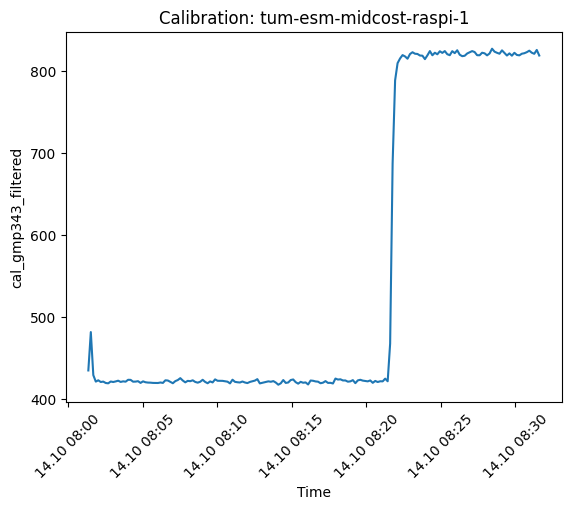

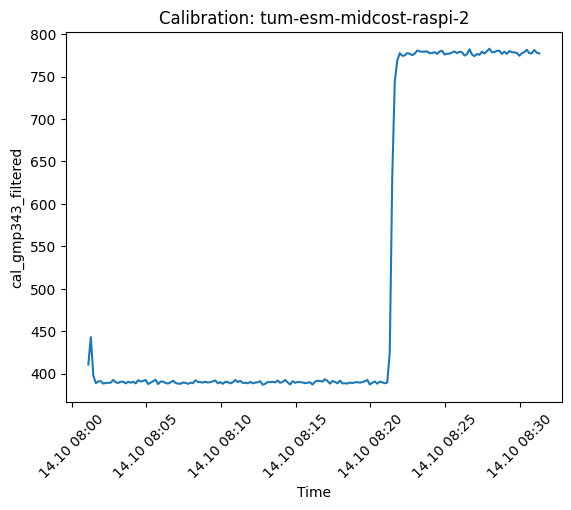

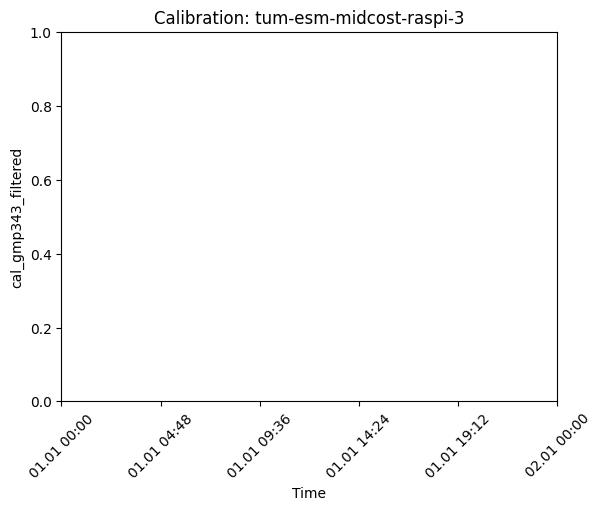

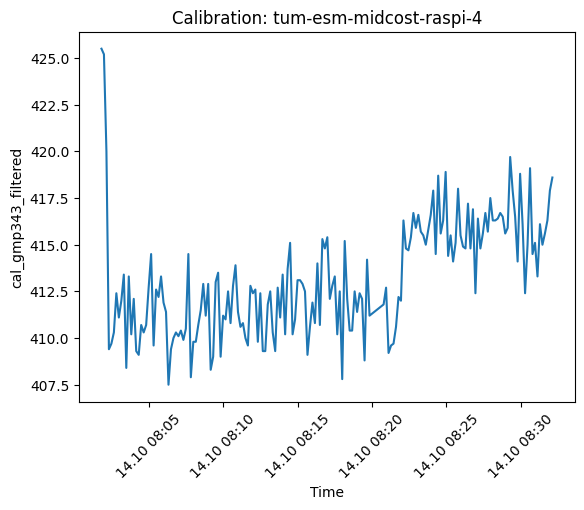

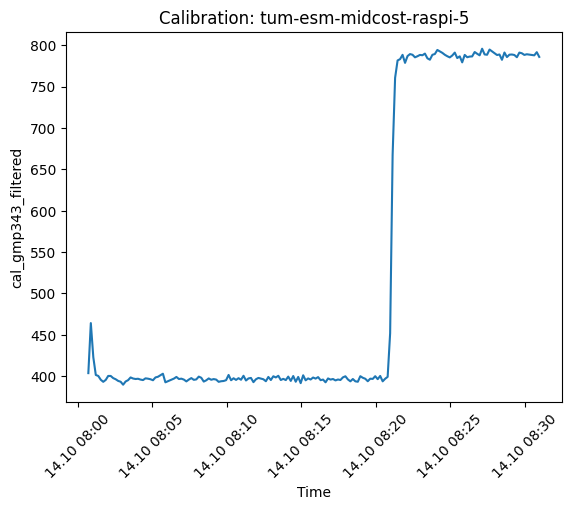

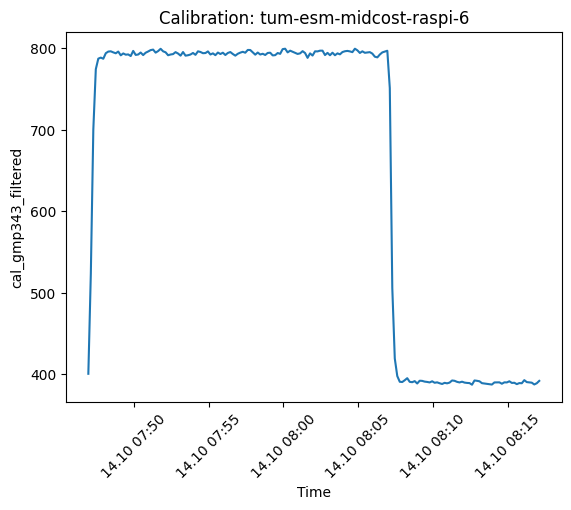

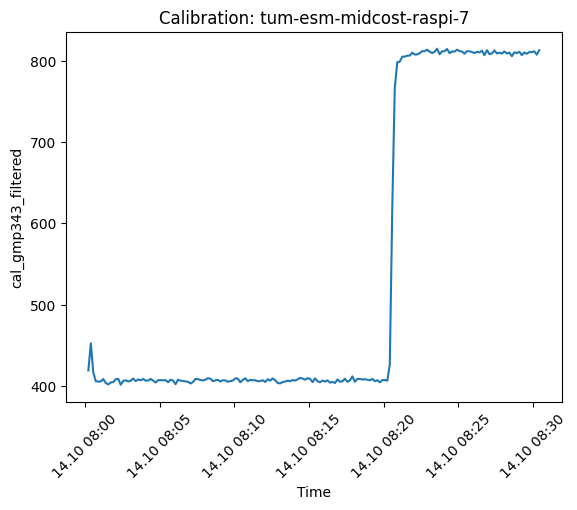

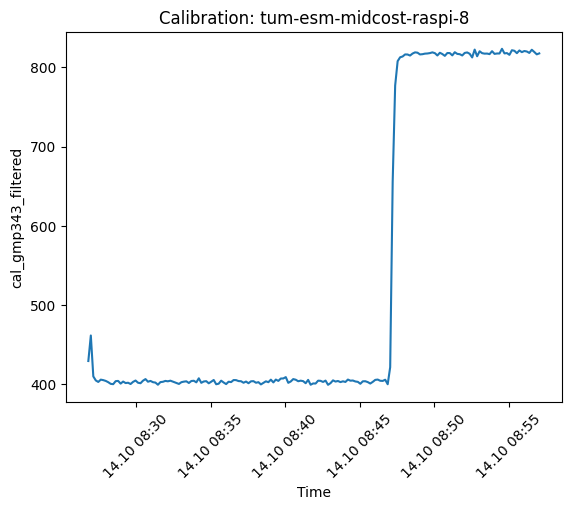

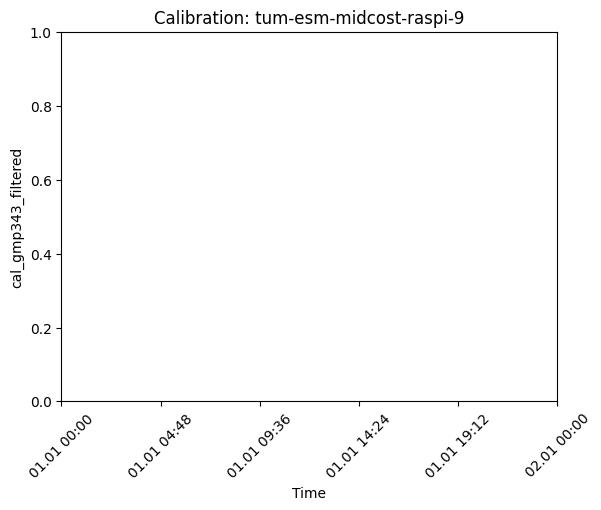

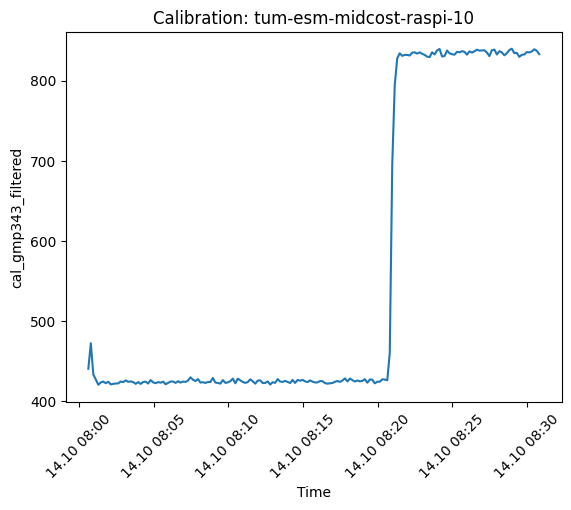

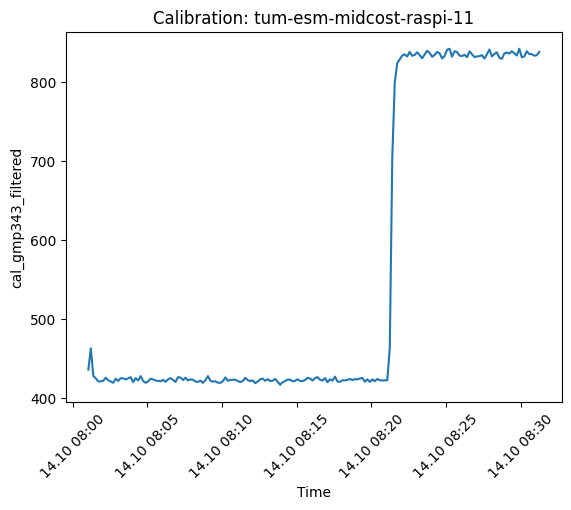

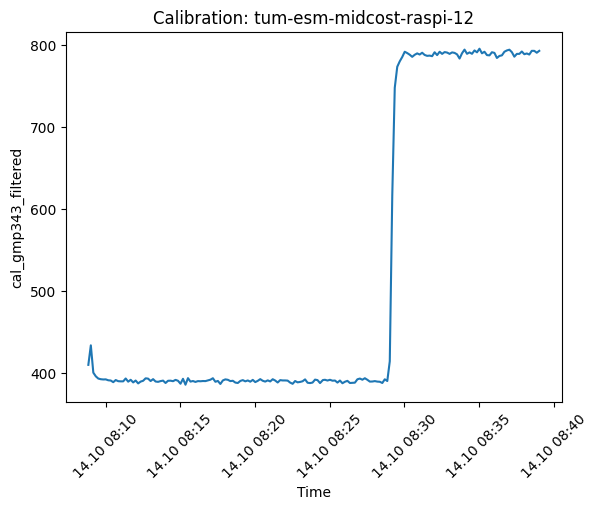

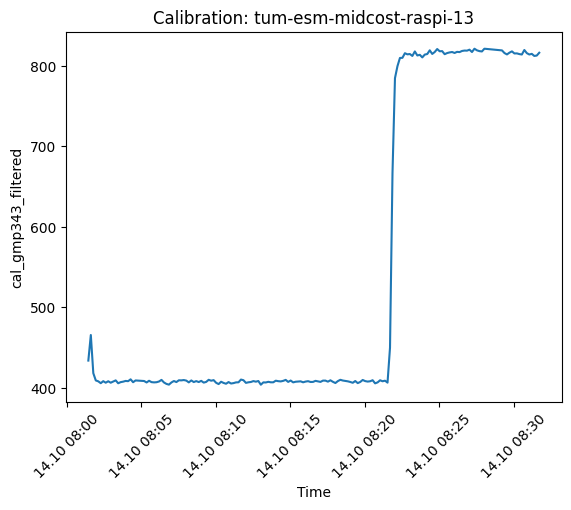

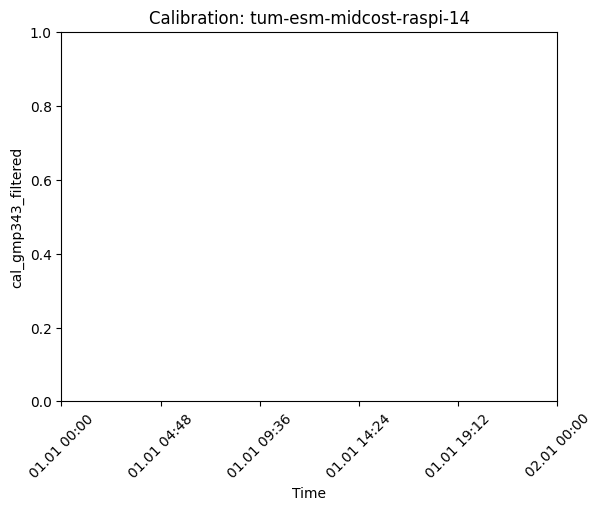

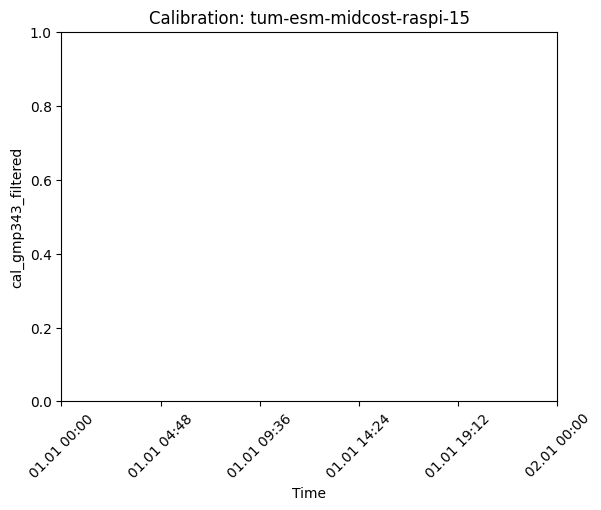

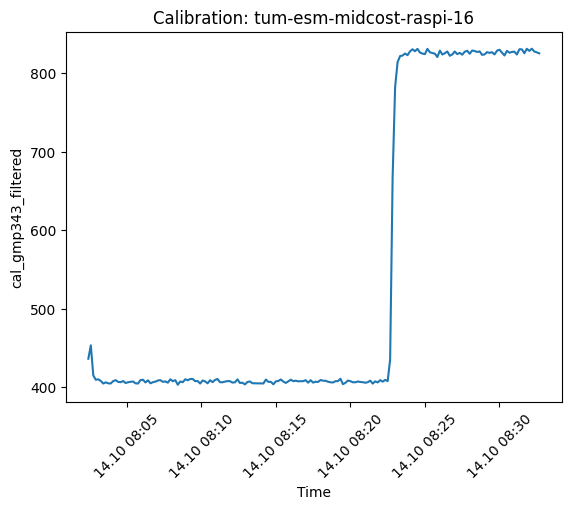

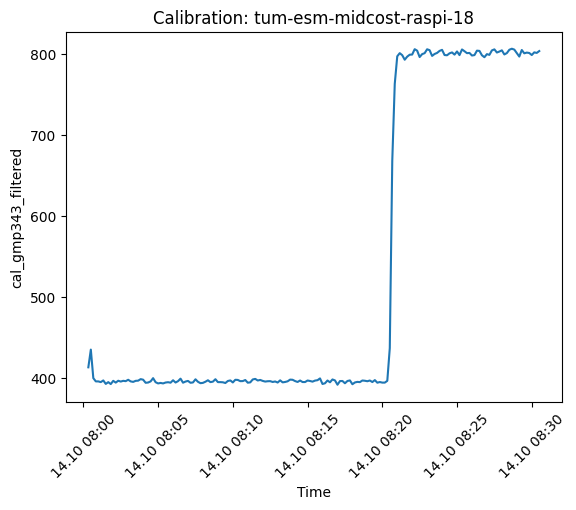

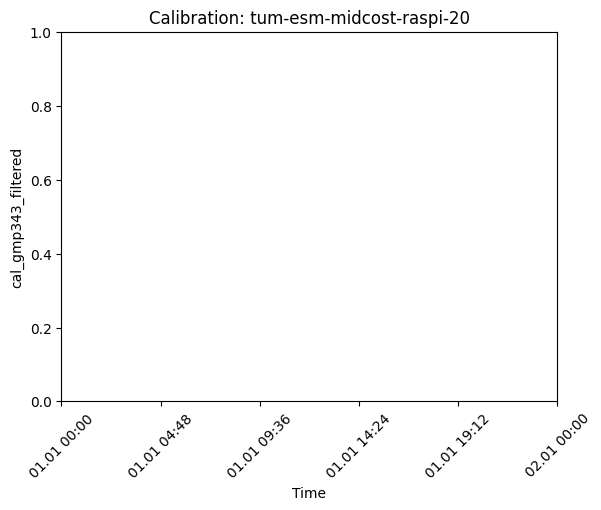

In [48]:
# Plot Calibration Data 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None)

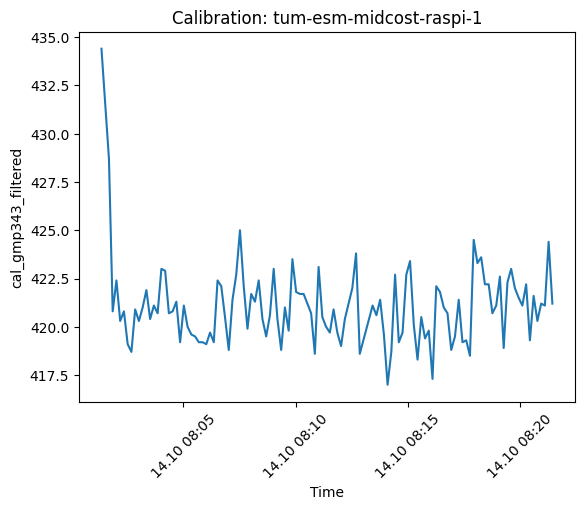

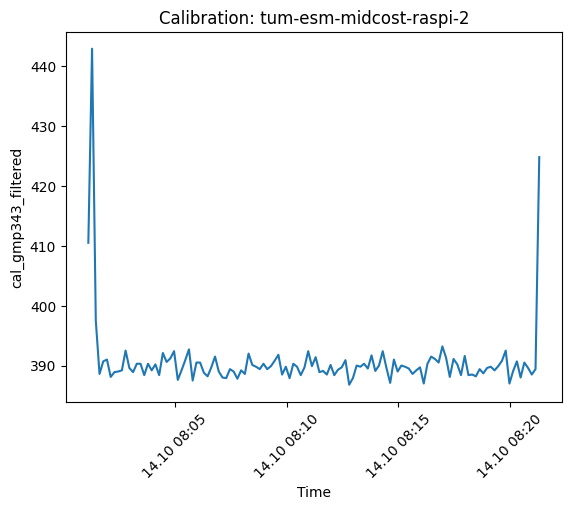

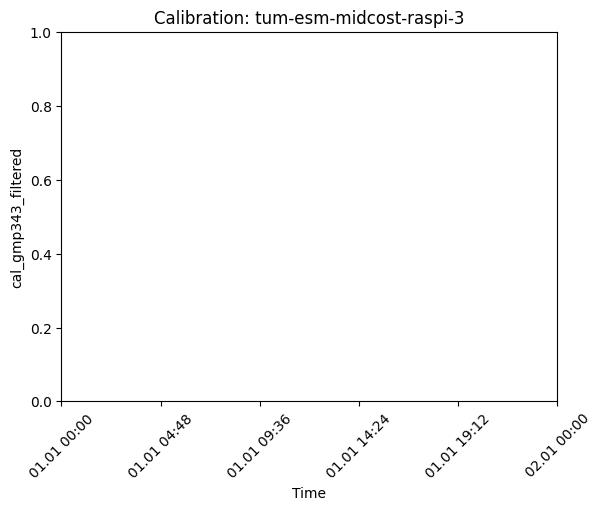

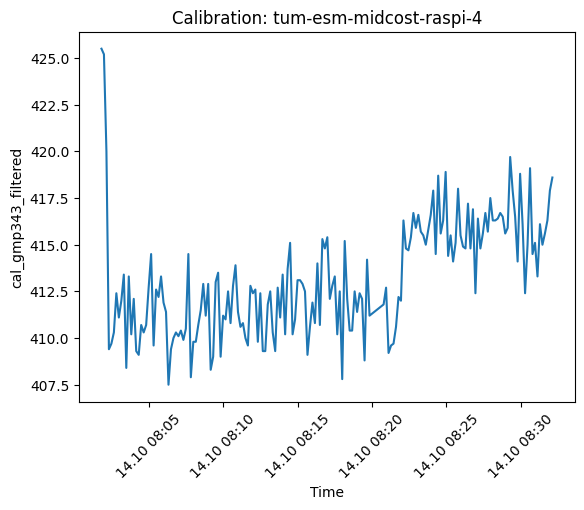

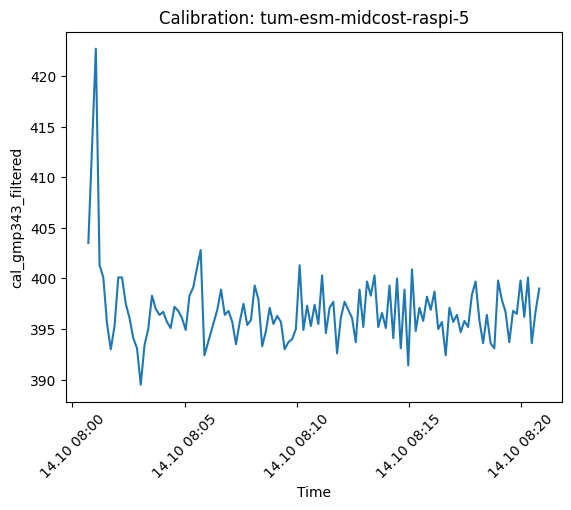

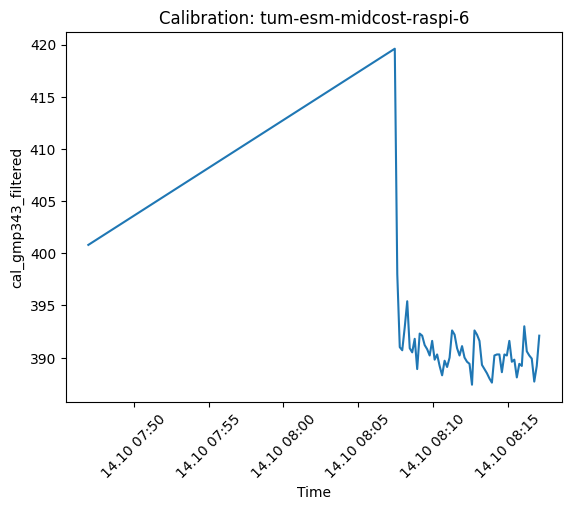

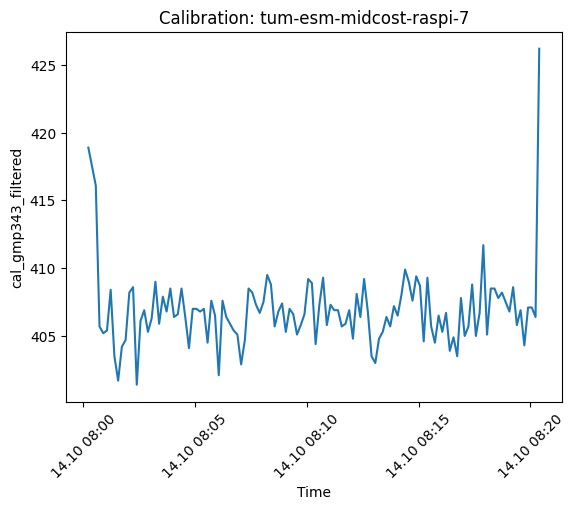

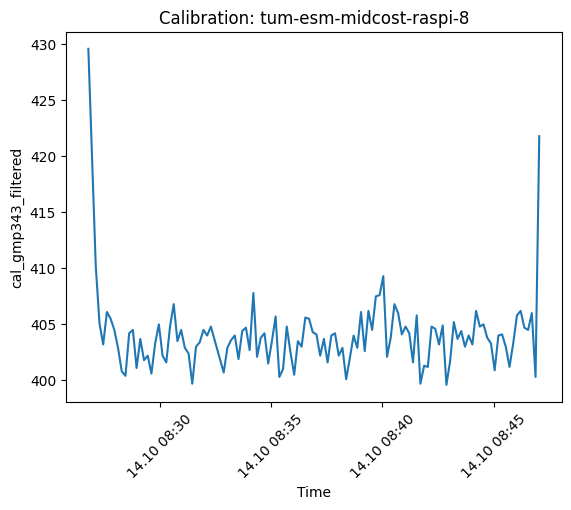

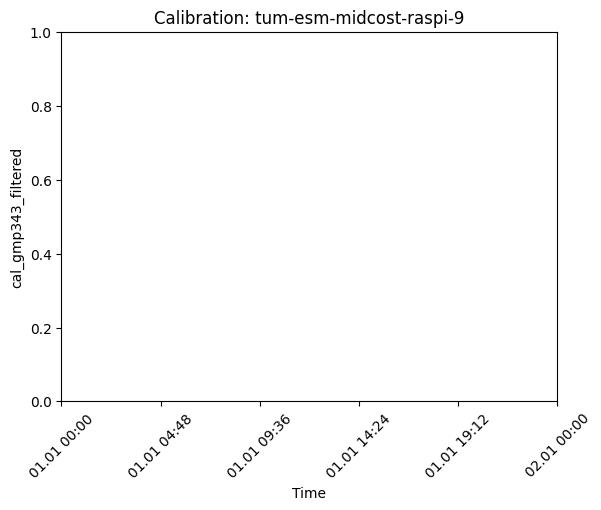

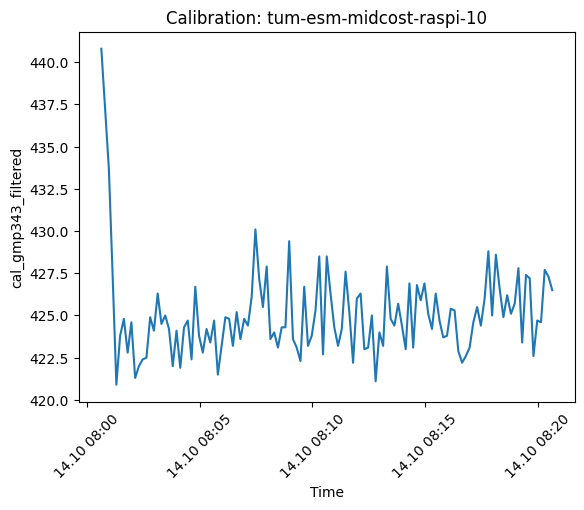

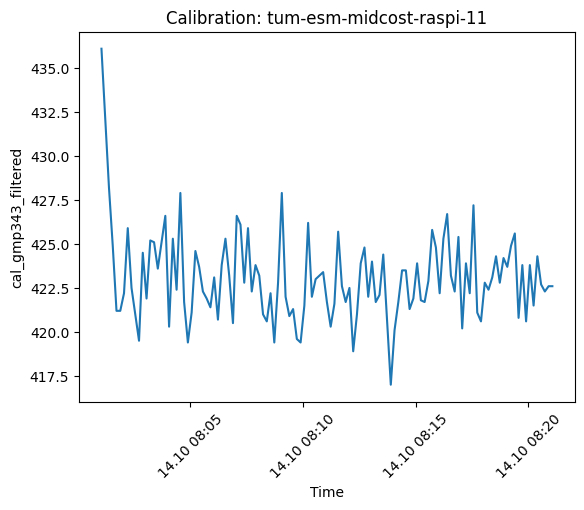

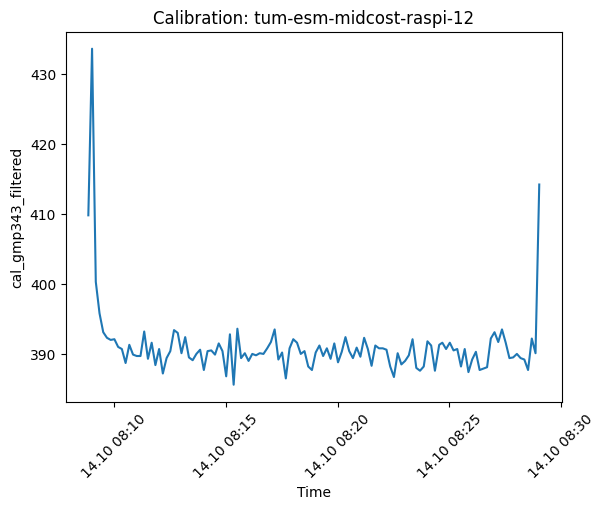

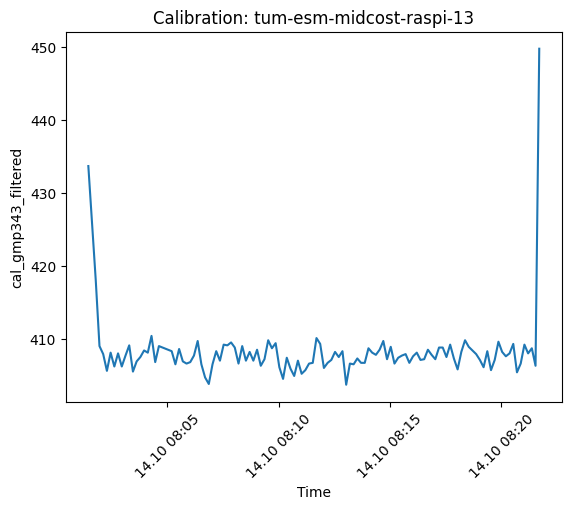

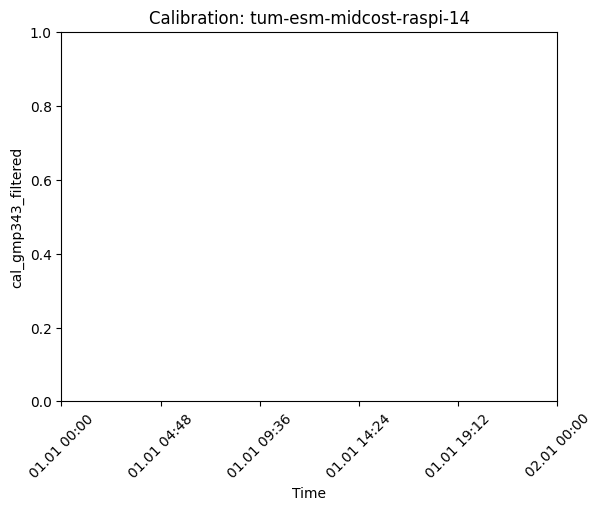

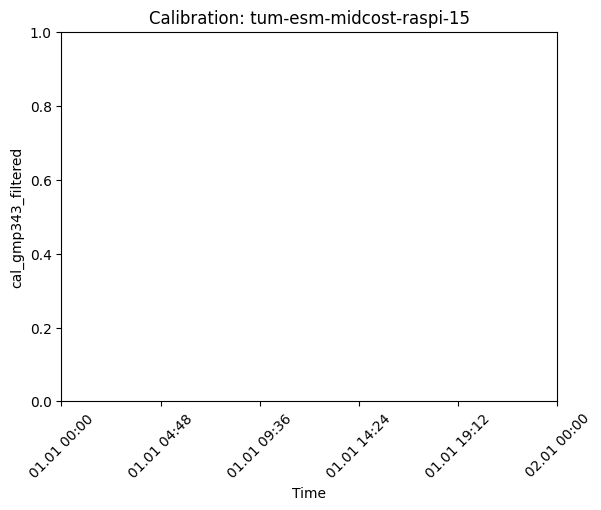

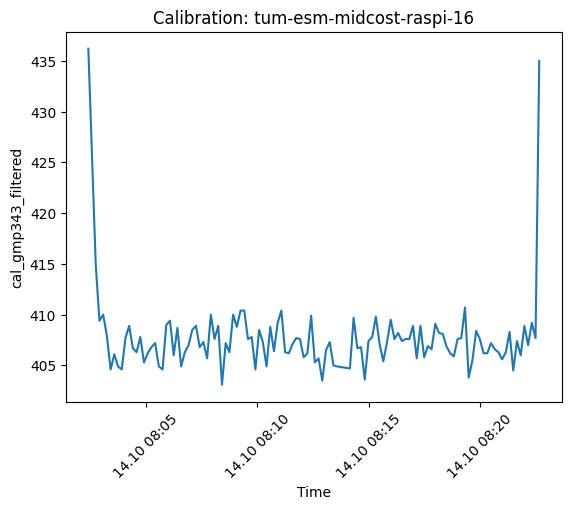

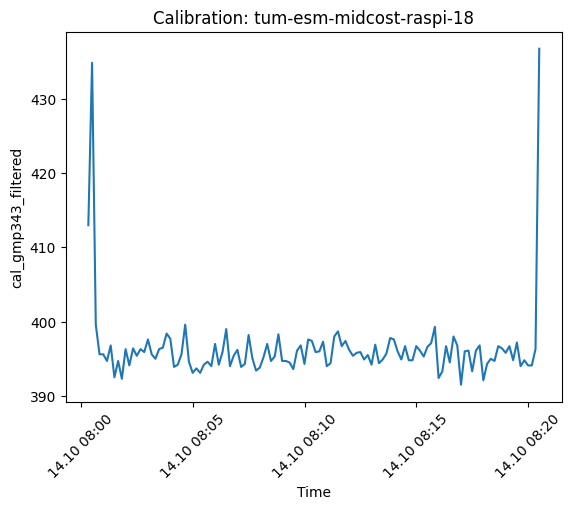

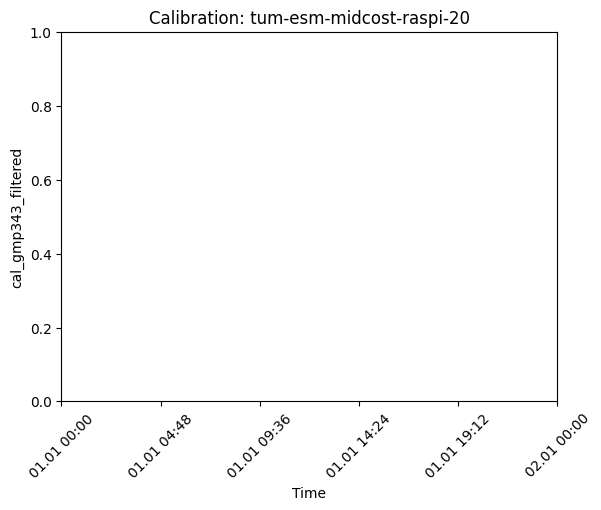

In [49]:
# Plot 400ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None, cut_above= 450, cut_below=350)


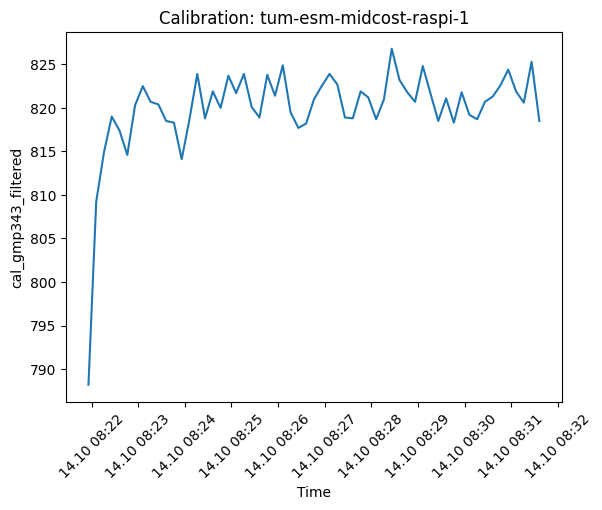

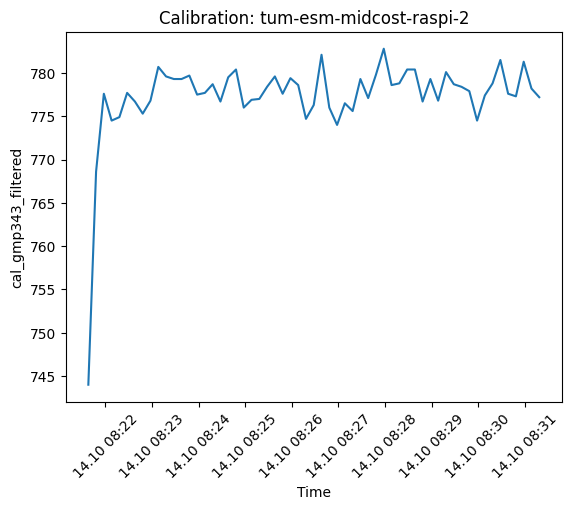

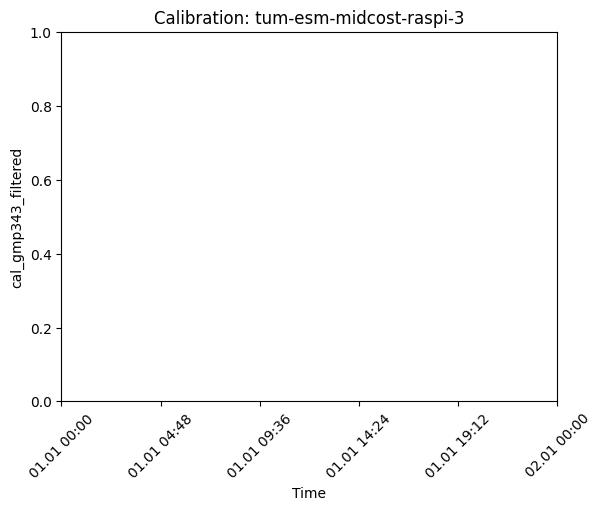

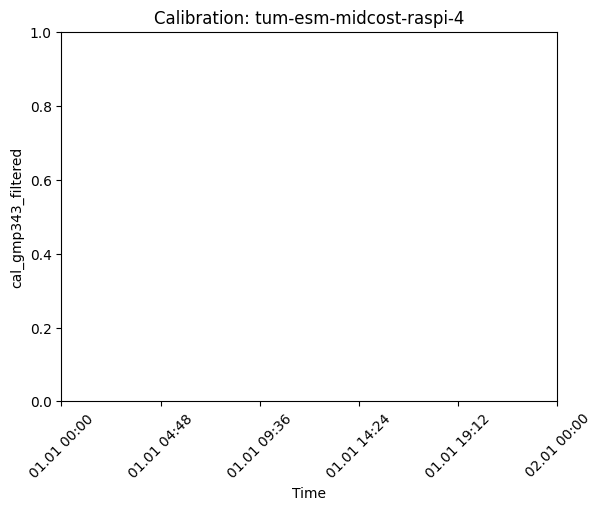

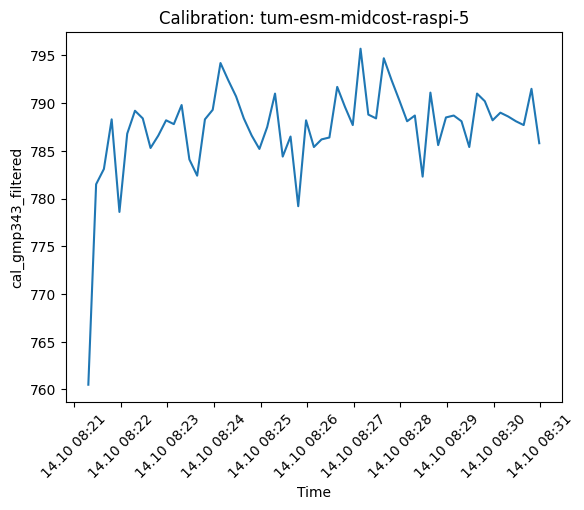

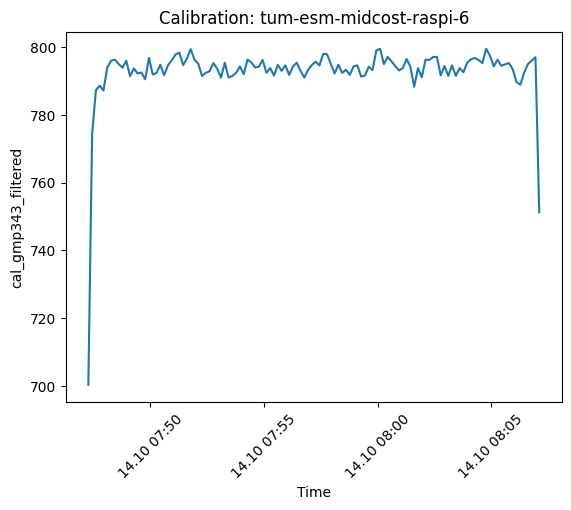

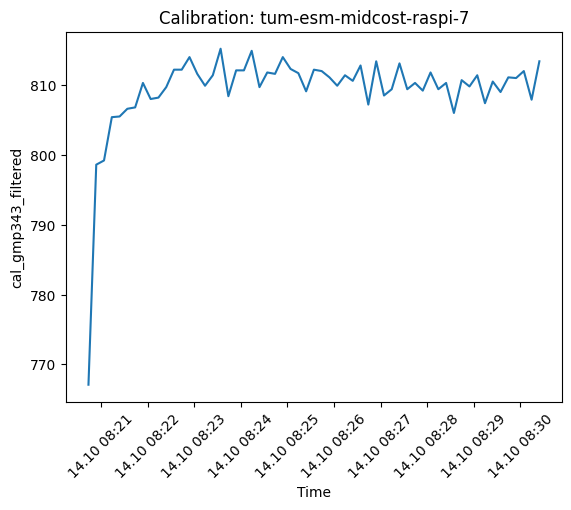

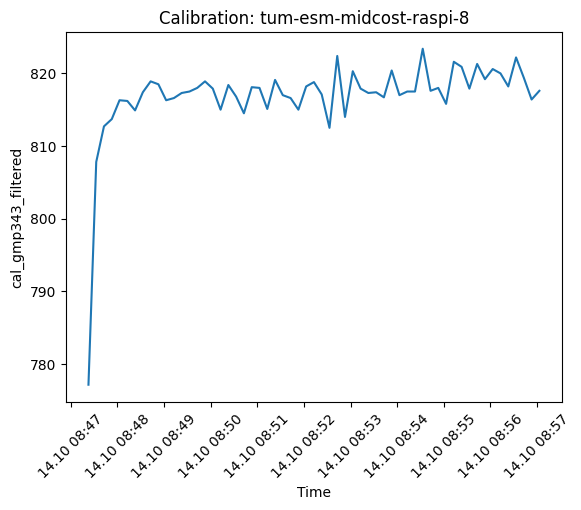

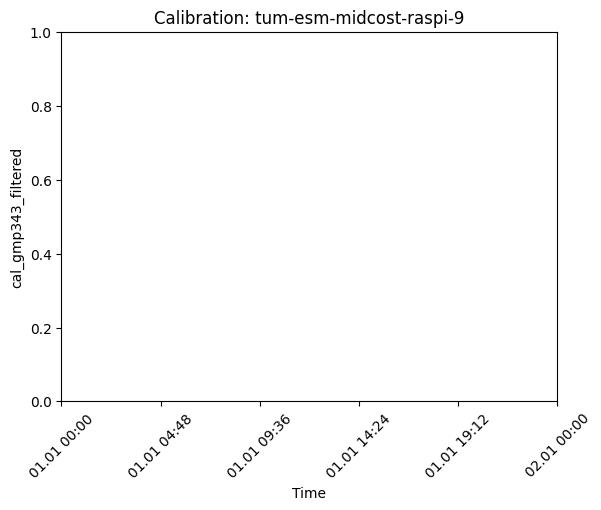

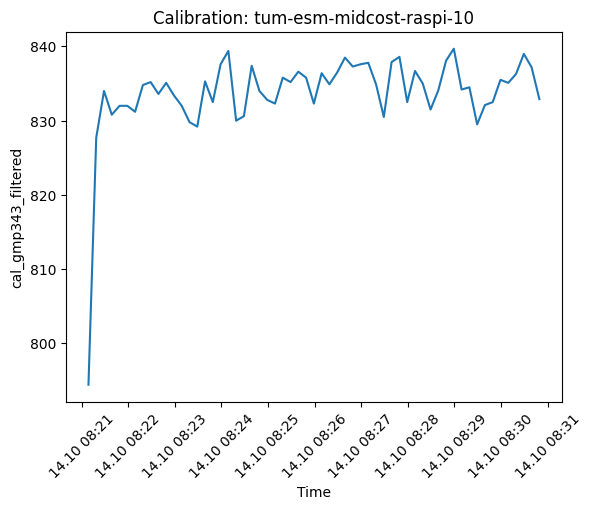

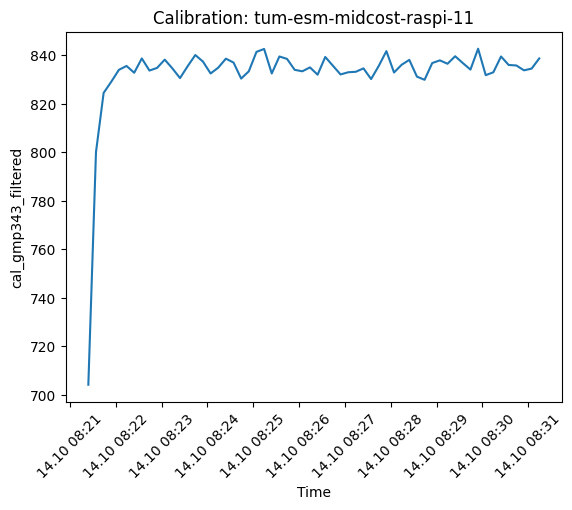

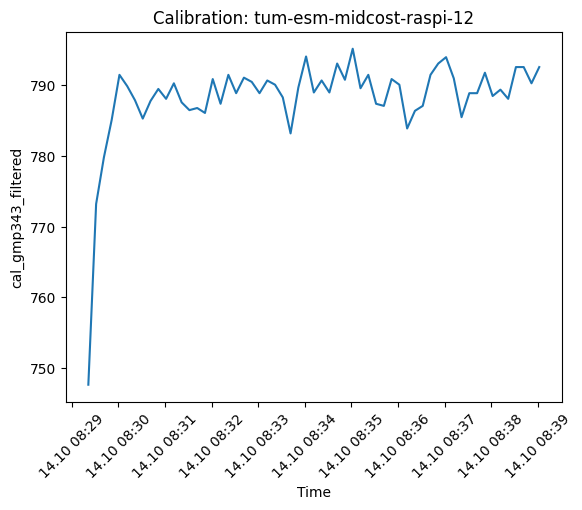

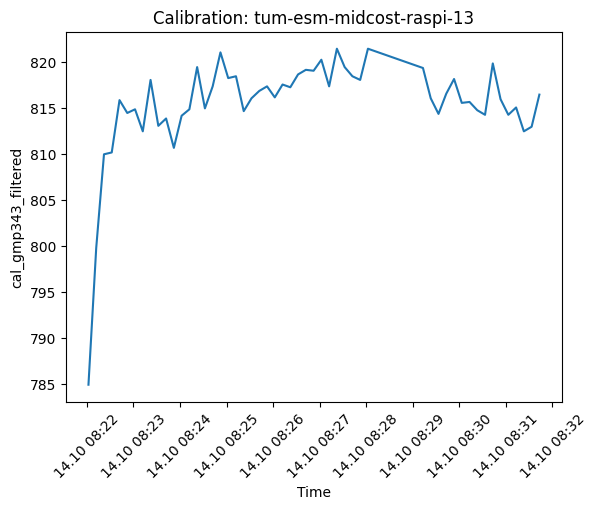

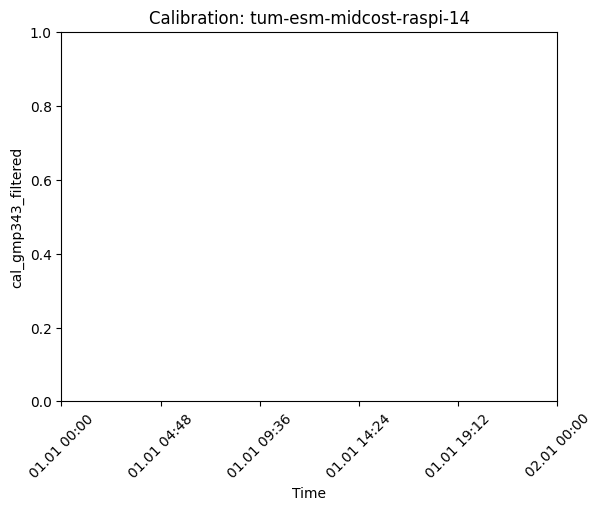

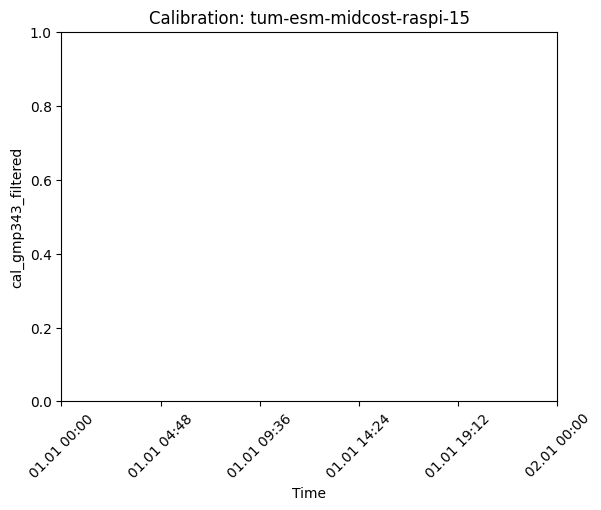

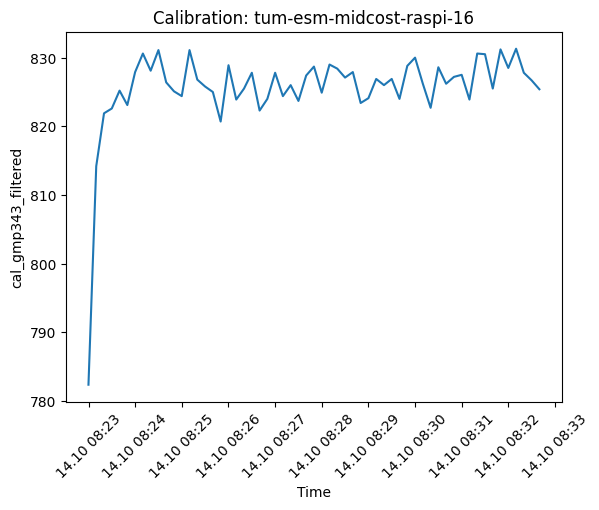

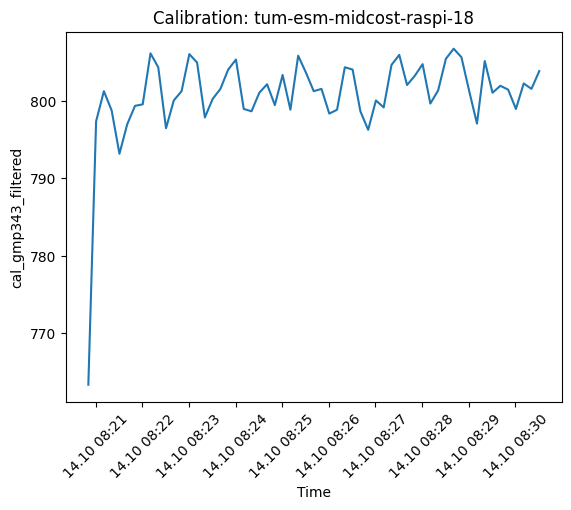

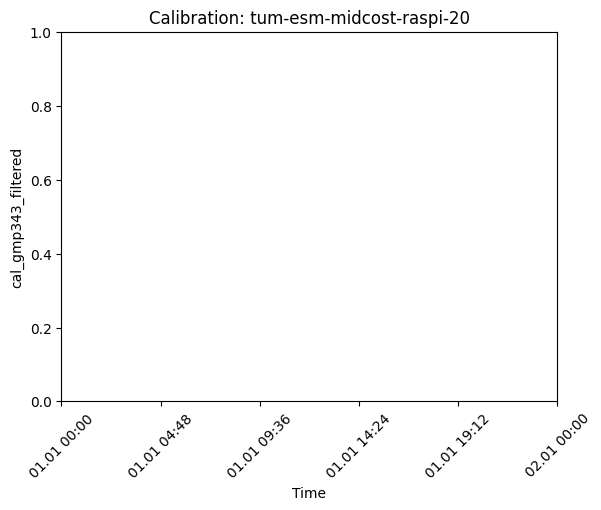

In [50]:
# Plot 800ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None, cut_below=700)